In [4]:
import os
import pandas as pd
from sodapy import Socrata
from tqdm import tnrange, tqdm_notebook #progress bar

In [5]:
API_ID = "f140732f"
API_KEY = "203ee2282ce46b64a9b600a04bf5f11d"
APP_TOKEN = "DlDJtYxY2WFzdKurgNfXvZkcH"

In [6]:
client = Socrata("data.cityofnewyork.us", app_token = APP_TOKEN, timeout = 100)

In [10]:
ds_ids = {'2010+':"fhrw-4uyv" ,'2009': '76rq-desm',
          '2008':'ttef-akmb', '2007':'bjsb-smxa', 
          '2006':'txvy-sgqz', '2005':'xk2u-49gx', 
          '2004':'fred-eu2a'} 

In [21]:
metadata = client.get_metadata(ds_ids['2010+'])

In [13]:
info.keys()

dict_keys(['id', 'name', 'attribution', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowIdentifierColumnId', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [20]:
info['

[{'flags': ['public'], 'inherited': False, 'type': 'viewer'}]

In [14]:
ds_ids = {'2004':'fred-eu2a'}

In [10]:
complaint_list = pd.read_csv("../data/complaints.txt").index.tolist()
complaint_tuple = tuple(complaint_list)

In [12]:
complaint_list

['HEATING',
 'Noise - Residential',
 'PLUMBING',
 'GENERAL CONSTRUCTION',
 'Street Condition',
 'Blocked Driveway',
 'Water System',
 'PAINT - PLASTER',
 'Street Light Condition',
 'Sewer',
 'HEAT/HOT WATER',
 'NONCONST',
 'Noise',
 'General Construction/Plumbing',
 'Noise - Street/Sidewalk',
 'Illegal Parking',
 'ELECTRIC',
 'Dirty Conditions',
 'Sanitation Condition',
 'Noise - Commercial',
 'Building/Use',
 'WATER LEAK',
 'Root/Sewer/Sidewalk Condition',
 'Snow',
 'Electrical',
 'Plumbing',
 'Water Conservation',
 'Water Quality',
 'Non-Residential Heat',
 'Standing Water']

In [16]:
fields = ",".join(['created_date', 'complaint_type', 'latitude', 'longitude'])
geo_filter = "latitude is not null AND longitude is not null"
#complaint_filter = f"complaint_type IN {complaint_tuple}"
query = f"{complaint_filter} and {geo_filter}"
query = geo_filter
limit = 100000 #paging parameter - technically don't need for 2.1 API  

In [17]:
for (dyear, ds_id) in tqdm_notebook(ds_ids.items(), desc='Years'):
    count = client.get(ds_ids[dyear], select='COUNT(*)', where=query)
    if 'count' in count[0]:
        num_rows = int(count[0]['count'])
    elif 'COUNT' in count[0]:
        num_rows = int(count[0]['COUNT'])
    else:
        num_rows = limit
        
    
    for offset in tqdm_notebook(range(0,num_rows, limit), desc='Complaints'):
        filename = "../data/complaints_chunks/{}_{}.csv".format(dyear, offset)
        if not os.path.exists(filename):
            results = client.get(ds_ids[dyear], select=fields, 
                             where=query, limit = limit, offset=offset, order=':id')
            df = pd.DataFrame.from_records(results)
            df.to_csv(filename, index=False)
        

In [20]:
import dask.dataframe as dd

In [21]:
df = dd.read_csv("../data/complaints_chunks/*")

In [22]:
df.columns

Index(['complaint_type', 'created_date', 'latitude', 'longitude'], dtype='object')

In [23]:
da = df.compute()

In [24]:
da['complaint_type'].unique()

array(['Street Condition', 'Noise - Street/Sidewalk', 'Blocked Driveway',
       'Water System', 'Sewer', 'Noise', 'General Construction/Plumbing',
       'HEATING', 'PLUMBING', 'PAINT - PLASTER', 'GENERAL CONSTRUCTION',
       'ELECTRIC', 'NONCONST', 'Sanitation Condition',
       'Noise - Commercial', 'Building/Use', 'Plumbing',
       'Dirty Conditions', 'Street Light Condition',
       'Non-Residential Heat', 'Snow', 'Water Conservation',
       'Root/Sewer/Sidewalk Condition', 'Electrical', 'Water Quality',
       'WATER LEAK', 'Illegal Parking', 'HEAT/HOT WATER',
       'Noise - Residential', 'Standing Water'], dtype=object)

In [20]:
da['complaint_type'].unique().shape

(30,)

In [25]:
da.to_csv("complaint_30_coords.csv", index=False)

In [22]:
complaint_list

['HEATING',
 'Noise - Residential',
 'PLUMBING',
 'GENERAL CONSTRUCTION',
 'Street Condition',
 'Blocked Driveway',
 'Water System',
 'PAINT - PLASTER',
 'Street Light Condition',
 'Sewer',
 'HEAT/HOT WATER',
 'NONCONST',
 'Noise',
 'General Construction/Plumbing',
 'Noise - Street/Sidewalk',
 'Illegal Parking',
 'ELECTRIC',
 'Dirty Conditions',
 'Sanitation Condition',
 'Noise - Commercial',
 'Building/Use',
 'WATER LEAK',
 'Root/Sewer/Sidewalk Condition',
 'Snow',
 'Electrical',
 'Plumbing',
 'Water Conservation',
 'Water Quality',
 'Non-Residential Heat',
 'Standing Water']

In [29]:
% matplotlib inline

import matplotlib.pyplot as plt

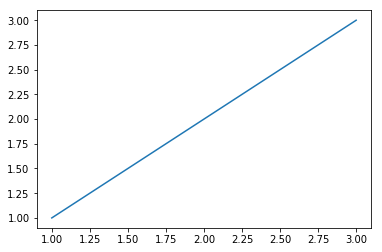

In [32]:
plt.plot([1,2,3], [1,2,3])

In [34]:
import numpy as np

In [35]:
a = np.zeros(5**12,)

In [38]:
a+4

array([ 4.,  4.,  4., ...,  4.,  4.,  4.])

In [39]:
whos

Variable           Type         Data/Info
-----------------------------------------
API_ID             str          f140732f
API_KEY            str          203ee2282ce46b64a9b600a04bf5f11d
APP_TOKEN          str          DlDJtYxY2WFzdKurgNfXvZkcH
Socrata            type         <class 'sodapy.Socrata'>
a                  ndarray      244140625: 244140625 elems, type `float64`, 1953125000 bytes (1862.645149230957 Mb)
client             Socrata      <sodapy.Socrata object at 0x12b8677b8>
complaint_filter   str          complaint_type IN ('HEATI<...> Heat', 'Standing Water')
complaint_list     list         n=30
complaint_tuple    tuple        n=30
count              list         n=1
da                 DataFrame                    complaint<...>7495738 rows x 4 columns]
dd                 module       <module 'dask.dataframe' <...>k/dataframe/__init__.py'>
df                 DataFrame    Dask DataFrame Structure:<...>: from-delayed, 534 tasks
ds_id              str          fred-eu2a
ds_i